In [1]:
import pandas as pd
Data=pd.read_csv("NewspaperData.csv")

In [2]:
Data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


In [6]:
Data.isna().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
import seaborn as sns

C:\Users\JAYA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='daily', ylabel='Density'>

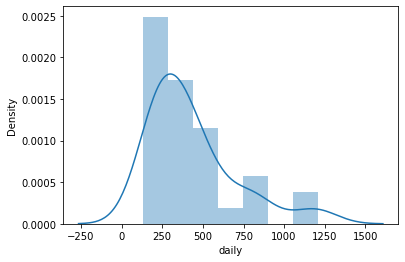

In [8]:
sns.distplot(Data["daily"])

C:\Users\JAYA\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sunday', ylabel='Density'>

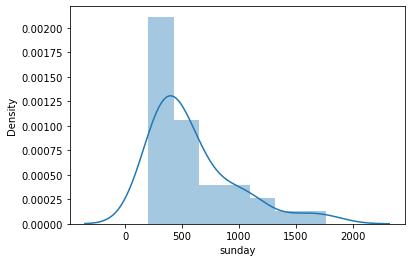

In [9]:
sns.distplot(Data['sunday'])

In [10]:
Data.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [11]:
import matplotlib.pyplot as plt

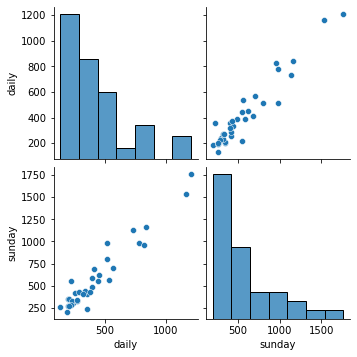

In [12]:
sns.pairplot(Data)

In [13]:
import statsmodels.formula.api as smf

In [15]:
model=smf.ols("sunday~daily",data=Data).fit()

In [16]:
model.params

Intercept    13.835630
daily         1.339715
dtype: float64

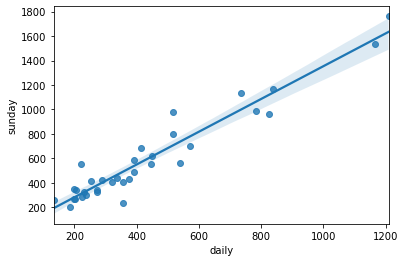

In [18]:
sns.regplot(x="daily", y="sunday", data=Data);

In [21]:
print(model.tvalues,'\n', model.pvalues)


Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [22]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9180596895873295, 0.9154990548869336)

In [27]:
#Predict for 200 and 300 daily circulation
new_data=pd.Series([200,300])

In [28]:
new_data

0    200
1    300
dtype: int64

In [32]:
DF=pd.DataFrame(new_data,columns=['daily'])

In [33]:
model.predict(DF)

0    281.778581
1    415.750057
dtype: float64